**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the dataset**

In [2]:
# Assuming the dataset is in a CSV file named 'Social_Network_Ads.csv'
df = pd.read_csv('Social_Network_Ads.csv')

**Dataset Visualization**

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

**EDA**

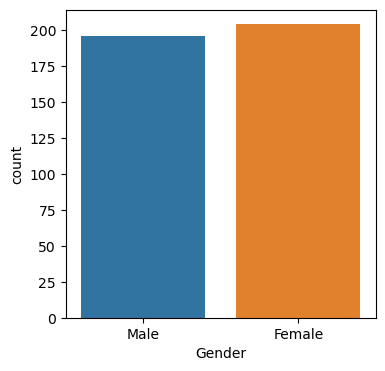

In [5]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Gender'])
plt.show()

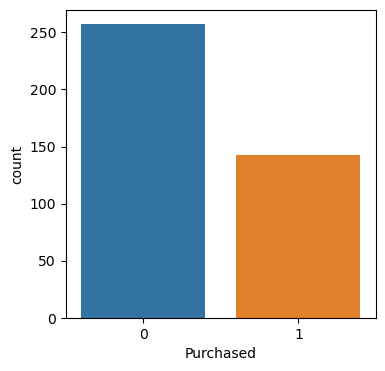

In [6]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Purchased'])
plt.show()

**Feature Extraction**

In [7]:
# Separate features (X) and target variable (y)
X = df.iloc[:, [1, 2, 3]].values  # Considering Gender, Age, and Estimated Salary as features
y = df.iloc[:, 4].values  # Assuming 'Purchased' is the target variable

**Use LabelEncoder for 'Gender' as 'Gender' is non-numeric**

In [8]:
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])

**Split the dataset into training and testing sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature scaling**

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Create a SVM classifier**

In [11]:
svm_classifier = SVC(kernel='linear', probability=True, random_state=0)

**Fit the model to the training data**

In [12]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

**Make predictions on the test set**

In [13]:
y_pred = svm_classifier.predict(X_test)

**Evaluate the performance of the classifier**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

**Print the results**

SVM Accuracy: 0.8625
SVM Confusion Matrix:
[[50  2]
 [ 9 19]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



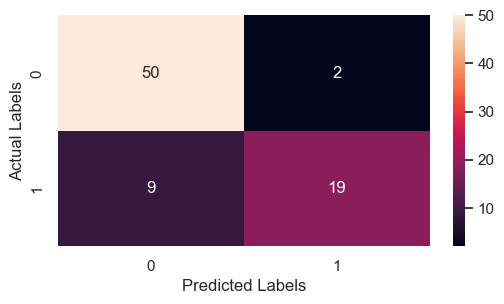

In [15]:
print(f'SVM Accuracy: {accuracy}')
print(f'SVM Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'SVM Classification Report:\n{classification_report_str}')

**Predict whether a targeted audience or person will purchase the product or not**

In [16]:
# Assuming we have a new set of feature values for prediction
new_data = np.array([[0, 30, 50000]])  # Example: Gender (0 for Female, 1 for Male), Age, Estimated Salary

# Use the trained SVM model to make predictions
predicted_purchase = svm_classifier.predict(scaler.transform(new_data))

# Print the predicted outcome
if predicted_purchase[0] == 1:
    print("The targeted audience is predicted to purchase the product.")
else:
    print("The targeted audience is predicted not to purchase the product.")

The targeted audience is predicted not to purchase the product.


**Output Visualization using Bar Plot**

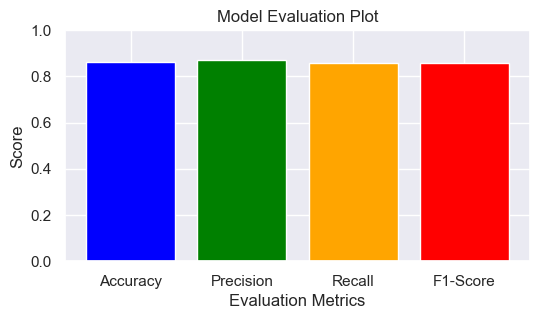

In [17]:
# Assuming we have already evaluated the model and obtained these metrics, hence plotting the same in a bar plot
accuracy = 0.8625
precision = 0.87
recall = 0.86
f1_score = 0.86

# Plotting the bar plot
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1
plt.title('Model Evaluation Plot')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.show()